In [2]:
import numpy as np
import pandas as pd

# <font color=red>Hands-on exercise - Linear Regression </font>

#### In this exercise, Boston housing dataset in Scikit-Learn will be used to perform linear regression. There are three basic steps:

#### (1) Load Dataset
#### (2) Exploratory Data Analysis (EDA)
#### (3) Machine Learning model

## <font color=red>1. Load Dataset</font>

##### First, load the dataset and get some "feel" of the data:  how many variables, size of the dataset, what are the variables, what does each variable mean, etc.

In [3]:
# Load Boston housing dataset from Scikit-Learn 
from sklearn.datasets import load_boston
dataset = load_boston ()

# Convert it to Pandas Datafram & find number of records
boston_df=pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Add target variable which is stored separately
boston_df['MEDV']=dataset.target

# Print number of records
print ("Number of records: ", len(boston_df))

Number of records:  506


In [4]:
# Explore the data
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# Get the list of column names
x_list=boston_df.columns.tolist()

# Remove the target column name
y_target=x_list.pop()

print ("Variables:", x_list, "Target:", y_target)

Variables: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] Target: MEDV


In [6]:
# Find what each column name means from the dataset
print (dataset.DESCR[300:1300])

    - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubi

## <font color=red> 2. Simple EDA</font>

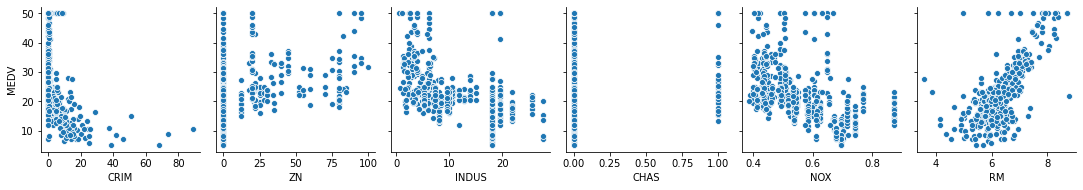

In [7]:
import seaborn as sns

# Visualize the target dependency on the variables - Split them into two rows for better visualization
sns.pairplot (boston_df, x_vars=x_list[:6], y_vars=[y_target]);

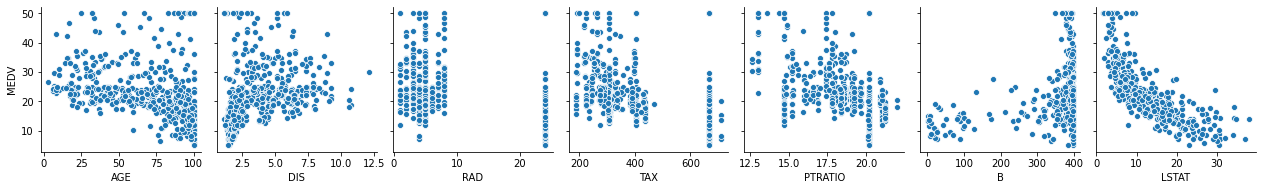

In [8]:
sns.pairplot (boston_df, x_vars=x_list[6:], y_vars=[y_target]);

##### <span style='background:yellow'><font color=blue> Remark: LSTAT and RM has strong impact on the target variable MEDV - can be used first to do regression</font></span>

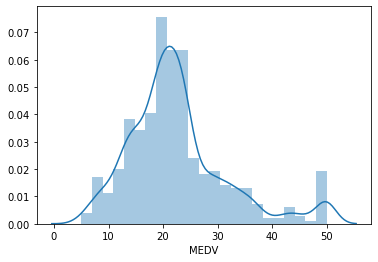

In [9]:
# Plot the distribution of the target 
sns.distplot(boston_df['MEDV']);

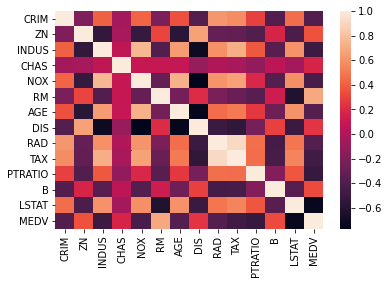

In [10]:
# Get how the variables are correlated 
boston_corr = boston_df.corr(method="pearson")

sns.heatmap(data=boston_corr);

## <font color=red> 3. Machine Learning Model</font>

### (a) Use specific columns (by-hand feature engineering) 
This amounts to selecting columns which has strong correlation with target variables and using them for regression. Later, we use feature selection algorithm to automatically select features.

In [11]:
# Selecting first LSTAT and RM
X = pd.DataFrame(boston_df, columns=['LSTAT', 'RM'])
Y = boston_df['MEDV']

In [12]:
# Split the dataset into train and test - do a 80% for train and 20% for test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=10)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(404, 2) (102, 2)
(404,) (102,)


In [13]:
# Train the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

In [15]:
# Now predict using the model on the training set first
y_train_predict = linear_model.predict(X_train)

#...and then for the test dataset
y_test_predict = linear_model.predict(X_test)

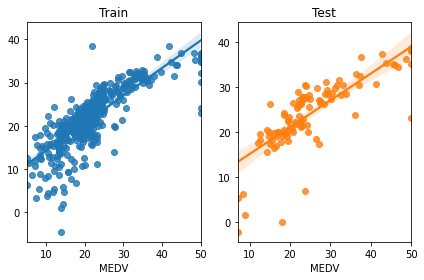

In [16]:
# Plot the predicted versus actual in the training set
import matplotlib.pyplot as plt
color=sns.color_palette()

fig, axes=plt.subplots (1,2)
ax1=sns.regplot (x=Y_train, y=y_train_predict, ax=axes[0], color=color[0])
ax2=sns.regplot (x=Y_test, y=y_test_predict, ax=axes[1], color=color[1])

ax1.set_title('Train')
ax2.set_title('Test')
plt.tight_layout()
plt.show();

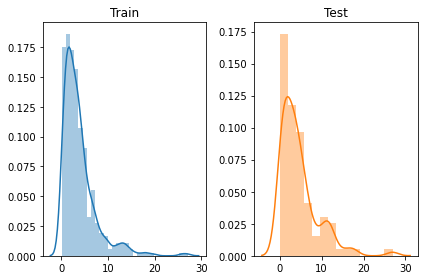

In [17]:
# Get distribution of the residuals
residual_train = np.abs(np.subtract(np.array(Y_train), np.array(y_train_predict)))
residual_test = np.abs(np.subtract(np.array(Y_test), np.array(y_test_predict)))

fig, axes=plt.subplots (1, 2)
color=sns.color_palette()

ax1=sns.distplot (residual_train, ax=axes[0], color=color[0])
ax2=sns.distplot (residual_test, ax=axes[1], color=color[1])

ax1.set_title('Train')
ax2.set_title('Test')
plt.tight_layout()
plt.show();

In [18]:
# Root-mean-square of the residuals for the train and test
rmse_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2_train = r2_score (Y_train, y_train_predict)

rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test = r2_score (Y_test, y_test_predict)

print ("RMSE for train:", rmse_train, "R2 score for train:", r2_train)
print ("RMSE for test :", rmse_test, "R2 score for test :", r2_test)

RMSE for train: 5.290363048551534 R2 score for train: 0.6363353379616083
RMSE for test : 6.434440411684905 R2 score for test : 0.6041142735229121


### (b) Use all variables available in the data set

In [19]:
# Create the new List
Xf = pd.DataFrame(boston_df, columns=x_list)
Yf = boston_df['MEDV']

# Create training and testing dataset
Xf_train, Xf_test, Yf_train, Yf_test = train_test_split(Xf, Yf, test_size = 0.2, random_state=10)

# Train a new model
linear_model_full = LinearRegression()
linear_model_full.fit(Xf_train, Yf_train)

# Predict on the train and test dataset
yf_train_predict = linear_model_full.predict(Xf_train)
yf_test_predict = linear_model_full.predict(Xf_test)

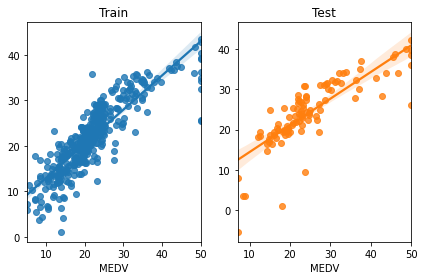

In [20]:
# Plot the target for train and test
fig, axes=plt.subplots (1,2)
ax1=sns.regplot (x=Yf_train, y=yf_train_predict, ax=axes[0], color=color[0])
ax2=sns.regplot (x=Yf_test, y=yf_test_predict, ax=axes[1], color=color[1])

ax1.set_title('Train')
ax2.set_title('Test')
plt.tight_layout()
plt.show();

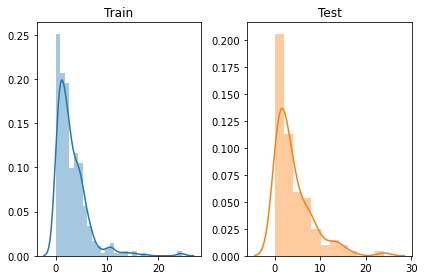

In [21]:
# Plot the distributions of the residuals
# Get distribution of the residuals
residual_train = np.abs(np.subtract(np.array(Yf_train), np.array(yf_train_predict)))
residual_test = np.abs(np.subtract(np.array(Yf_test), np.array(yf_test_predict)))

fig, axes=plt.subplots (1, 2)
color=sns.color_palette()

ax1=sns.distplot (residual_train, ax=axes[0], color=color[0])
ax2=sns.distplot (residual_test, ax=axes[1], color=color[1])

ax1.set_title('Train')
ax2.set_title('Test')
plt.tight_layout()
plt.show();

In [189]:
# Root-mean-square of the residuals for the train and test
rmse_train = (np.sqrt(mean_squared_error(Yf_train, yf_train_predict)))
r2_train = r2_score (Yf_train, yf_train_predict)

rmse_test = (np.sqrt(mean_squared_error(Yf_test, yf_test_predict)))
r2_test = r2_score (Yf_test, yf_test_predict)

print ("RMSE for train:", rmse_train, "R2 score for train:", r2_train)
print ("RMSE for test :", rmse_test, "R2 score for test :", r2_test)

RMSE for train: 4.385300318036732 R2 score for train: 0.750121534530608
RMSE for test : 5.866341999333023 R2 score for test : 0.6709339839115628


##### <font color=blue> <span style='background:yellow'>Remark: Better R2 score compared to using only 2 variables. Also the root-mean-square error improved.
</span></font>

### (c) Feature selection

##### First, let us understand concept of penalized linear regression. 
Use L2 penalty term (Exercise: understand mathematics behind this)

In [246]:
# Create the new List
Xl2 = pd.DataFrame(boston_df, columns=x_list)
Yl2 = boston_df['MEDV']

# Create training and testing dataset
Xl2_train, Xl2_test, Yl2_train, Yl2_test = train_test_split(Xl2, Yl2, test_size = 0.2, random_state=10)

In [247]:
from sklearn.linear_model import Ridge

# Train the model
rr_model = Ridge(alpha=1, fit_intercept=True)
rr_model.fit(Xl2_train, Yl2_train)

# Predict on the train and test dataset
yl2_train_predict = rr_model.predict(Xl2_train)
yl2_test_predict = rr_model.predict(Xl2_test)

In [248]:
# Root-mean-square of the residuals for the train and test
rmse_train = (np.sqrt(mean_squared_error(Yl2_train, yl2_train_predict)))
r2_train = r2_score (Yl2_train, yl2_train_predict)

rmse_test = (np.sqrt(mean_squared_error(Yl2_test, yl2_test_predict)))
r2_test = r2_score (Yl2_test, yl2_test_predict)

print ("RMSE for train:", rmse_train, "R2 score for train:", r2_train)
print ("RMSE for test :", rmse_test, "R2 score for test :", r2_test)

RMSE for train: 4.4037623578050304 R2 score for train: 0.7480131375144308
RMSE for test : 5.914025559798654 R2 score for test : 0.6655627286231776


In [249]:
# Loop over alpha (hyper-parameter)
for a in range(0,20,1):
    rr_model = Ridge(alpha=a, fit_intercept=True)
    rr_model.fit(Xl2_train, Yl2_train)
    
    yl2_train_predict = rr_model.predict(Xl2_train)
    yl2_test_predict = rr_model.predict(Xl2_test)
    
    r2_train = r2_score (Yl2_train, yl2_train_predict)
    r2_test = r2_score (Yl2_test, yl2_test_predict)
    print ("Alpha: ", a, "R2 score for train: ", r2_train, "R2 score for train:", r2_test)
    
    #rmse_train = (np.sqrt(mean_squared_error(Yfs_train, yfs_train_predict)))
    #rmse_test = (np.sqrt(mean_squared_error(Yfs_test, yfs_test_predict)))
    #print ("Alpha: ", a, "RMSE for train: ", rmse_train, "RMSE for train:", rmse_test)

Alpha:  0 R2 score for train:  0.750121534530608 R2 score for train: 0.6709339839115636
Alpha:  1 R2 score for train:  0.7480131375144308 R2 score for train: 0.6655627286231776
Alpha:  2 R2 score for train:  0.7460479437895559 R2 score for train: 0.6622292412268544
Alpha:  3 R2 score for train:  0.7447268254905919 R2 score for train: 0.659911365760797
Alpha:  4 R2 score for train:  0.7437967422515108 R2 score for train: 0.6581187601991185
Alpha:  5 R2 score for train:  0.7431032285719339 R2 score for train: 0.65663196673309
Alpha:  6 R2 score for train:  0.7425601943488435 R2 score for train: 0.655340638009081
Alpha:  7 R2 score for train:  0.7421175860240857 R2 score for train: 0.6541835131022498
Alpha:  8 R2 score for train:  0.7417447486126676 R2 score for train: 0.6531238354330902
Alpha:  9 R2 score for train:  0.7414220134753399 R2 score for train: 0.6521381509060348
Alpha:  10 R2 score for train:  0.7411362529191663 R2 score for train: 0.6512107290932625
Alpha:  11 R2 score for t

##### <font color=blue> <span style='background:yellow'>Remark: R2 score decreases monotonically as alpha increases. L2 penalty does not lead to any improvement in the prediction.</span></font>

##### Next we use L1 penalty (also called LASSO) for feature selection

In [250]:
# Create the new List
Xfs = pd.DataFrame(boston_df, columns=x_list)
Yfs = boston_df['MEDV']

# Create training and testing dataset
Xfs_train, Xfs_test, Yfs_train, Yfs_test = train_test_split(Xfs, Yfs, test_size = 0.2, random_state=10)

In [251]:
from sklearn.linear_model import Lasso

# Train the model
lr_model = Lasso (alpha=1, fit_intercept=True)
lr_model.fit(Xfs_train, Yfs_train)

# Predict on the train and test dataset
yfs_train_predict = rr_model.predict(Xfs_train)
yfs_test_predict = rr_model.predict(Xfs_test)

In [252]:
# Root-mean-square of the residuals for the train and test
rmse_train = (np.sqrt(mean_squared_error(Yfs_train, yfs_train_predict)))
r2_train = r2_score (Yfs_train, yfs_train_predict)

rmse_test = (np.sqrt(mean_squared_error(Yfs_test, yfs_test_predict)))
r2_test = r2_score (Yl2_test, yl2_test_predict)

print ("RMSE for train:", rmse_train, "R2 score for train:", r2_train)
print ("RMSE for test :", rmse_test, "R2 score for test :", r2_test)

RMSE for train: 4.479144462830916 R2 score for train: 0.7393124510934346
RMSE for test : 6.098772977236354 R2 score for test : 0.6443414842276636
